<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Types-and-One-Hot-Encoding" data-toc-modified-id="Data-Types-and-One-Hot-Encoding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Types and One Hot Encoding</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Region-as-OHE" data-toc-modified-id="Region-as-OHE-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Region as OHE</a></span></li><li><span><a href="#Participants-as-Numerical-Buckets" data-toc-modified-id="Participants-as-Numerical-Buckets-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Participants as Numerical Buckets</a></span></li><li><span><a href="#Protestor-Identity-as-OHE-Categories" data-toc-modified-id="Protestor-Identity-as-OHE-Categories-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Protestor Identity as OHE Categories</a></span><ul class="toc-item"><li><span><a href="#Stemming-and-creating-a-dictionary-to-map-values" data-toc-modified-id="Stemming-and-creating-a-dictionary-to-map-values-1.0.3.1"><span class="toc-item-num">1.0.3.1&nbsp;&nbsp;</span>Stemming and creating a dictionary to map values</a></span></li><li><span><a href="#Gathering-the-top-Protester-Identity-categories" data-toc-modified-id="Gathering-the-top-Protester-Identity-categories-1.0.3.2"><span class="toc-item-num">1.0.3.2&nbsp;&nbsp;</span>Gathering the top Protester Identity categories</a></span></li><li><span><a href="#If-not-in-one-of-the-top-categories-assign-Other" data-toc-modified-id="If-not-in-one-of-the-top-categories-assign-Other-1.0.3.3"><span class="toc-item-num">1.0.3.3&nbsp;&nbsp;</span>If not in one of the top categories assign Other</a></span></li></ul></li><li><span><a href="#Government-Type-as-OHE-categories" data-toc-modified-id="Government-Type-as-OHE-categories-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Government Type as OHE categories</a></span><ul class="toc-item"><li><span><a href="#Filling-nulls-with-None" data-toc-modified-id="Filling-nulls-with-None-1.0.4.1"><span class="toc-item-num">1.0.4.1&nbsp;&nbsp;</span>Filling nulls with None</a></span></li></ul></li><li><span><a href="#Saving-to-csv" data-toc-modified-id="Saving-to-csv-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Saving to csv</a></span></li></ul></li><li><span><a href="#Baseline-Value" data-toc-modified-id="Baseline-Value-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baseline Value</a></span></li></ul></li><li><span><a href="#Neural-Net" data-toc-modified-id="Neural-Net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neural Net</a></span></li></ul></div>

# Data Types and One Hot Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import metrics

In [2]:
from nltk.stem.porter import PorterStemmer

In [3]:
df = pd.read_csv('../data/global_cia_combined.csv')

In [4]:
df.head()

,country,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,...,govt_type,legal_system,gdp_purchasing_power_global_rank,gdp_growth_global_rank,electricity_access_percent,electricity_generating_capacity_global_rank,internet_access_percent,cell_phone_per_100,military_spending_annual_percent_gdp,transnational_disputes
0,Canada,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,...,federal parliamentary democracy (Parliament of...,"common law system except in Quebec, where civi...",17.0,112.0,100.0,8.0,91.0,90.0,1.31,managed maritime boundary disputes with the US...
1,Canada,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,...,federal parliamentary democracy (Parliament of...,"common law system except in Quebec, where civi...",17.0,112.0,100.0,8.0,91.0,90.0,1.31,managed maritime boundary disputes with the US...
2,Canada,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,...,federal parliamentary democracy (Parliament of...,"common law system except in Quebec, where civi...",17.0,112.0,100.0,8.0,91.0,90.0,1.31,managed maritime boundary disputes with the US...
3,Canada,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,...,federal parliamentary democracy (Parliament of...,"common law system except in Quebec, where civi...",17.0,112.0,100.0,8.0,91.0,90.0,1.31,managed maritime boundary disputes with the US...
4,Canada,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,...,federal parliamentary democracy (Parliament of...,"common law system except in Quebec, where civi...",17.0,112.0,100.0,8.0,91.0,90.0,1.31,managed maritime boundary disputes with the US...


In [5]:
df.dtypes

country                                         object
year                                             int64
region                                          object
protest                                          int64
protestnumber                                    int64
startday                                       float64
startmonth                                     float64
startyear                                      float64
endday                                         float64
endmonth                                       float64
endyear                                        float64
protesterviolence                              float64
location                                        object
participants                                    object
protesteridentity                               object
sources                                         object
notes                                           object
final                                           object
ignore    

### Region as OHE
The data set has every country excluding the USA, so maybe breaking down by region instead could add features without overkill on adding every single country in the world as a feature.

In [6]:
df['region'].unique()

array(['North America', 'Central America', 'South America', 'Europe',
       'Africa', 'MENA', 'Asia', 'Oceania'], dtype=object)

In [7]:
df = pd.get_dummies(data = df, columns = ['region'], drop_first=True)

### Participants as Numerical Buckets


In [8]:
df['participants'].value_counts(normalize=True)

100s                         0.087478
1000s                        0.078124
50+                          0.074962
50                           0.065740
1000                         0.063632
                               ...   
6000-8000                    0.000066
more than a dozen schools    0.000066
scores (>50)                 0.000066
widespread                   0.000066
86                           0.000066
Name: participants, Length: 781, dtype: float64

There are many numbers used for number of protestors. We will place them into bins in order to keep the categories down.

### Protestor Identity as OHE Categories


In [9]:
len(df['protesteridentity'].value_counts(normalize=True))

5768

In [10]:
df['protesteridentity'].value_counts(normalize=True).head(25)

protesters                                                         0.105267
students                                                           0.043855
workers                                                            0.018581
unspecified                                                        0.015302
farmers                                                            0.014960
residents                                                          0.011681
opposition supporters                                              0.011135
university students                                                0.009837
demonstrators                                                      0.009359
opposition                                                         0.009085
women                                                              0.007856
teachers                                                           0.006694
ladies in white                                                    0.006148
people      

There are many protestor identities. We will stem the data in order to categorize them into several of the top categories in order to use this as a one hot encoded feature.

In [11]:
p_stemmer = PorterStemmer()

In [12]:
df['protesteridentity'].fillna('None')

0                                              unspecified
1                                              unspecified
2                               separatist parti quebecois
3                                           mohawk indians
4                                          local residents
                               ...                        
15188                                       asylum seekers
15189                                  university students
15190    protesters opposed to renewing the licence of ...
15191    protesters opposed to counting irregularities ...
15192                                               locals
Name: protesteridentity, Length: 15193, dtype: object

#### Stemming and creating a dictionary to map values

In [13]:
stem_list = [p_stemmer.stem(i) for i in df['protesteridentity'].astype(str)]
protester_id = [i for i in df['protesteridentity']]
protester_id_dict = dict(zip(protester_id, stem_list))

In [14]:
df['protesteridentity'].value_counts(normalize=False).head()

protesters     1541
students        642
workers         272
unspecified     224
farmers         219
Name: protesteridentity, dtype: int64

In [15]:
df['protesteridentity_stem'] = df['protesteridentity'].map(protester_id_dict)

#### Gathering the top Protester Identity categories

In [16]:
protest_stem_dict = {'protest' : 'protest',              
'student' : 'student',              
'nan' : 'unspecifi',                  
'worker' : 'worker',               
'unspecifi' : 'unspecifi',            
'farmer' : 'farmer',               
'resid' : 'resid',                
'opposition support' : 'opposit',   
'university stud' : 'student',       
'demonstr' : 'protest',              
'opposit' : 'opposit',               
'women' : 'women',                 
'teacher' : 'teacher',               
'ladies in whit' : 'ladies_in_whit',     
'youth' : 'student',
'peopl' : 'peopl',                                                                                    
'activist' : 'activist',                                                                                 
'taxi driv' : 'taxi_driv',                                                                                
'journalist' : 'journalist',                                                                               
'pegida patriotic europeans against the islamization of the west' : 'pegida',                          
'soldier' : 'soldier',                                                                                  
'protestor' : 'protest',                                                                                
'stuttgart 21' : 'stuttgart_21',                                                                             
'prison' : 'prison',                                                                                  
'labor union' : 'labor_union',                                                                              
'pro democracy activists; civil human rights front' : 'pro_democraci',                                        
'villag' : 'villag',                                                                                   
'fishermen' : 'fishermen',                                                                                
'pegida' : 'pegida',                                                                                   
'muslim' : 'muslim',                                                                                   
'local' : 'local',                                                                                    
'miner' : 'miner',                                                                                    
'indian' : 'indian',                                                                                   
'pro democracy activists; hirak' : 'pro_democraci',                                                            
'anti government protest' : 'anti_govt',                                                                  
'peruvian' : 'peruvian',                                                                                 
'ethnic albanian' : 'ethnic albanian',                                                                        
'opposition supporters demanding the resignation of president hery rajaonarimampianina' : 'opposit',    
'kurd' : 'kurd',                                                                                     
'local resid' : 'resid',                                                                             
'awami leagu' : 'awami leagu',                                                                             
'chaves oppon'  : 'opposit',                                                                              
'bangladesh nationalist parti' : 'nationalist_parti',                                                             
'civil serv' : 'civil serv',                                                                              
'anti corruption protest' : 'anti_curruption',                                                                  
'pension' : 'pension',                                                                                  
'opposition parti' : 'opposit',                                                                        
'pro democraci' : 'pro democraci',                                                                            
'trader' : 'trader',                                                                                   
'anti government demonstr' : 'anti_govt',                                                                 
}

In [17]:
df['protesteridentity_stem'] = df['protesteridentity_stem'].map(protest_stem_dict)

#### If not in one of the top categories assign Other

In [18]:
df['protesteridentity_stem'].fillna('Other', inplace = True)

### Government Type as OHE categories

In [19]:
len(df['govt_type'].value_counts(normalize=False))

29

There are 29 original categories to condense in order to One Hot Encode and use as a feature.

In [20]:
df['govt_type'].isna().sum()

1211

#### Filling nulls with None

In [21]:
df['govt_type'].fillna('None', inplace=True)

In [22]:
govt_dict = {'presidential republic' : 'presidential_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
'parliamentary republic' : 'parliamentary_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
'semi-presidential republic' : 'semi-presidential_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
'federal parliamentary republic' : 'federal_parliamentary_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
'federal presidential republic' : 'federal_presidential_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
'parliamentary constitutional monarchy; a Commonwealth realm' : 'commonwealth_realm',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
'parliamentary constitutional monarchy' : 'parliamentary_constitutional_monarchy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
'communist party-led state' : 'communist_state',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
'constitutional monarchy' : 'constitutional_monarchy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
'semi-presidential federation' : 'semi-presidential_federation',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
'in transition' : 'in_transition',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
'federal parliamentary constitutional monarchy\nnote: all Peninsular Malaysian states have hereditary rulers (commonly referred to as sultans) except Melaka (Malacca) and Pulau Pinang (Penang); those two states along with Sabah and Sarawak in East Malaysia have governors appointed by government; powers of state governments are limited by the federal constitution; under terms of federation, Sabah and Sarawak retain certain constitutional prerogatives (e.g., right to maintain their own immigration controls)' : 'federal_parliamentary_constitutional_monarchy',                                                                                                                                                                                                                                  
'Republic of Cyprus - presidential republic; "Turkish Republic of Northern Cyprus" (self-declared) - parliamentary republic with enhanced presidency\nnote: a separation of the two main ethnic communities inhabiting the island began following the outbreak of communal strife in 1963; this separation was further solidified when a Greek military-junta-supported coup attempt prompted the Turkish military intervention in July 1974 that gave the Turkish Cypriots de facto control in the north; Greek Cypriots control the only internationally recognized government on the island; on 15 November 1983, then Turkish Cypriot "President" Rauf DENKTAS declared independence and the formation of the "TRNC,” which is recognized only by Turkey' : 'presidential_republic',   
'theocratic republic' : 'theocratic_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
'communist state' : 'communist_state',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
'parliamentary democracy; note - constitutional changes adopted in December 2015 transformed the government to a parliamentary system' : 'parliamentary_democracy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
'presidential republic in name, although in fact a dictatorship' : 'dictatorship',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
'federal parliamentary democracy (Parliament of Canada) under a constitutional monarchy; a Commonwealth realm; federal and state authorities and responsibilities regulated in constitution' : 'commonwealth_realm',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
'absolute monarchy' : 'absolute_monarchy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
'federal parliamentary democracy under a constitutional monarchy' : 'federal_parliamentary_democracy_under_constitutional_monarchy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
'constitutional monarchy (emirate)' : 'emirate',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
'presidential Islamic republic' : 'presidential_islamic_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
'parliamentary democracy under a constitutional monarchy; a Commonwealth realm' : 'commonwealth_realm',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
'presidential republic; highly authoritarian' : 'authoritarian_presidential_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
'parliamentary democracy (Parliament) under a constitutional monarchy; a Commonwealth realm' : 'commonwealth_realm',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
'presidential republic; highly authoritarian regime' : 'authoritarian_presidential_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
'parliamentary constitutional monarchy; part of the Kingdom of the Netherlands': 'parliamentary_constitutional_monarchy',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
'federal republic (formally a confederation)' : 'federal_republic',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
'presidential republic; authoritaria' : 'authoritarian_presidential_republic',
    
    
}

In [23]:
#https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
df['govt_type'].map(govt_dict).value_counts(normalize=True)

presidential_republic                                            0.333453
parliamentary_republic                                           0.186507
semi-presidential_republic                                       0.118615
federal_parliamentary_republic                                   0.084132
federal_presidential_republic                                    0.066962
commonwealth_realm                                               0.049864
parliamentary_constitutional_monarchy                            0.031693
communist_state                                                  0.031263
constitutional_monarchy                                          0.021605
semi-presidential_federation                                     0.014594
in_transition                                                    0.012877
federal_parliamentary_constitutional_monarchy                    0.010588
theocratic_republic                                              0.008800
parliamentary_democracy               

In [24]:
df['govt_type'] = df['govt_type'].map(govt_dict)

In [25]:
df = pd.get_dummies(data = df, columns = ['govt_type', 'protesteridentity_stem'], drop_first=True)

In [26]:
df['gdp_purchasing_power_global_rank'].fillna(df['gdp_purchasing_power_global_rank'].median(), inplace=True)

In [27]:
df['gdp_growth_global_rank'].fillna(df['gdp_growth_global_rank'].median(), inplace=True)

In [28]:
df['electricity_access_percent'].fillna(df['electricity_access_percent'].median(), inplace=True)

In [29]:
df['internet_access_percent'].fillna(df['internet_access_percent'].median(), inplace=True)

In [30]:
df['cell_phone_per_100'].fillna(df['cell_phone_per_100'].median(), inplace=True)

### Saving to csv

In [31]:
df.to_csv('../data/combined_ohe.csv')

## Baseline Value

In [32]:
df['accomodation'].value_counts(normalize=True)

0    0.899822
1    0.100178
Name: accomodation, dtype: float64

The baseline accuracy is 90% if the model only predicts the majority class of 0: Non-Accommodation.

# Neural Net

In [33]:
df.shape

(15193, 114)

In [34]:
df['year'] = pd.to_datetime(df['year'])

In [35]:
df.set_index('year', inplace=True)
df.sort_index(inplace=True)

In [36]:
X = df.drop(columns=['climate', 'natural_resources', 'population_distribution', 'net_migration_per_1000_population','language', 'legal_system',  'accomodation', 'country', 'location', 'participants', 'protesteridentity', 'sources', 'notes', 'final', 'electricity_generating_capacity_global_rank', 'transnational_disputes', 'military_spending_annual_percent_gdp'])
y = df['accomodation']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, random_state=12)
X_train.index[-1], X_test.index[0]

(Timestamp('1970-01-01 00:00:00.000002014'),
 Timestamp('1970-01-01 00:00:00.000002014'))

In [38]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [39]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)

In [40]:
input_shape = train_sequences[0][0][0].shape

model = Sequential()
model.add(GRU(128, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model.add(GRU(64, return_sequences=False))                         # False if next layer is Dense
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['acc', ])

history = model.fit(train_sequences, validation_data=test_sequences, batch_size = epochs=50, verbose=0)

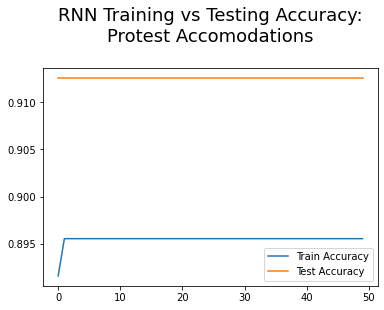

In [41]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.title('RNN Training vs Testing Accuracy:\nProtest Accomodations\n', fontsize=18)
plt.legend();

In [45]:
model2 = Sequential()
model2.add(GRU(128, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model2.add(GRU(64, return_sequences=True))
model2.add(GRU(32, return_sequences=False)) # False if next layer is Dense
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(patience = 5)

history2 = model2.fit(train_sequences, validation_data=test_sequences, epochs=50, batch_size=64, callbacks = [es], verbose=True)

Epoch 1/50
178/178 [==============================] - 27s 43ms/step - loss: nan - acc: 0.8841 - val_loss: nan - val_acc: 0.9125
Epoch 2/50
178/178 [==============================] - 4s 24ms/step - loss: nan - acc: 0.8922 - val_loss: nan - val_acc: 0.9125
Epoch 3/50
178/178 [==============================] - 4s 25ms/step - loss: nan - acc: 0.8983 - val_loss: nan - val_acc: 0.9125
Epoch 4/50
178/178 [==============================] - 4s 23ms/step - loss: nan - acc: 0.8987 - val_loss: nan - val_acc: 0.9125
Epoch 5/50
178/178 [==============================] - 4s 25ms/step - loss: nan - acc: 0.9008 - val_loss: nan - val_acc: 0.9125


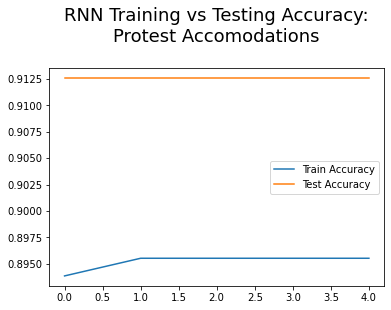

In [46]:
plt.plot(history2.history['acc'], label='Train Accuracy')
plt.plot(history2.history['val_acc'], label='Test Accuracy')
plt.title('RNN Training vs Testing Accuracy:\nProtest Accomodations\n', fontsize=18)
plt.legend();

Since the model is consistently putting out the same accuracy 